In [1]:
#Import all required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [3]:
df=pd.read_csv('/content/sample_data/loan_data_1.csv')
df.head()

,Income,CreditScore,EmploymentType,LoanAmount,LoanApproved
0,35795,558,Salaried,1571091,1
1,20860,678,Business,768234,1
2,96820,685,Self-Employed,478480,1
3,74886,612,Self-Employed,132711,0
4,26265,688,Salaried,891971,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Income          100 non-null    int64 
 1   CreditScore     100 non-null    int64 
 2   EmploymentType  100 non-null    object
 3   LoanAmount      100 non-null    int64 
 4   LoanApproved    100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [5]:
X=df.drop('LoanApproved',axis=1)
y=df['LoanApproved']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print('Training Data')
print(X_train.shape)
print(X_test.shape)
print('Testing Data')
print(y_train.shape)
print(y_test.shape)

Training Data
(80, 4)
(20, 4)
Testing Data
(80,)
(20,)


In [9]:
numeric_features=['Income','CreditScore','LoanAmount']
categorical_features=['EmploymentType']

In [10]:
numeric_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [11]:
categorical_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(drop='first'))
])

In [12]:
preprocessor=ColumnTransformer(transformers=[
    ('numeric',numeric_pipeline,numeric_features),
    ('categorical',categorical_pipeline,categorical_features)
])

In [13]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [14]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'CreditScore',
                                                   'LoanAmount']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['EmploymentType'])])),
                ('classifier', LogisticRegression())])

In [15]:
#Training
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'CreditScore',
                                                   'LoanAmount']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['EmploymentType'])])),
                ('classifier', LogisticRegression())])

In [16]:
#prediction
y_pred=model_pipeline.predict(X_test)

In [17]:
print('Actula Values')
print(y_test.values)
print('Predicted Values')
print(y_pred)

Actula Values
[0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1]
Predicted Values
[0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]


In [18]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.71      0.92      0.80        13

    accuracy                           0.70        20
   macro avg       0.69      0.60      0.60        20
weighted avg       0.69      0.70      0.66        20



In [19]:
print(confusion_matrix(y_test,y_pred))

[[ 2  5]
 [ 1 12]]


In [21]:
print(accuracy_score(y_test,y_pred))

0.7


In [25]:
from hashlib import new
#Income	CreditScore	EmploymentType	LoanAmount
# predict for a new customer
income=int(input('Enter Income: '))
credit_score=int(input('Enter Credit Score: '))
employment_type=input('Enter Employment Type: ')
loan_amount=int(input('Enter Loan Amount: '))
new_data=pd.DataFrame({'Income':[income],'CreditScore':[credit_score],'EmploymentType':[employment_type],'LoanAmount':[loan_amount]})
prediction=model_pipeline.predict(new_data)
if prediction[0]==1:
  print('Loan Approved')
else:
  print('Loan Not Approved')

Enter Income: 15000
Enter Credit Score: 650
Enter Employment Type: Salaried
Enter Loan Amount: 7500000
Loan Not Approved


#### Unsupervised Machine Learning Example



In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
df_customers=pd.read_csv('/content/sample_data/customers.csv')
df_customers.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [42]:
X=df_customers.drop('CustomerID',axis=1)


In [43]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [44]:
#Number of Clusters Elbow Method
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
  print(wcss)

[40.00000000000001]
[40.00000000000001, 25.787574659757706]
[40.00000000000001, 25.787574659757706, 10.577359914416192]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129, 0.7593796969613971]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129, 0.7593796969613971, 0.47419549714648024]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129, 0.7593796969613971, 0.47419549714648024, 0.30464116832968635]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129, 0.7593796969613971, 0.47419549714648024, 0.30464116832968635, 0.19666200932566533]
[40.00000000000001, 25.787574659757706, 10.577359914416192, 4.089514732775045, 0.8698798899947129, 0

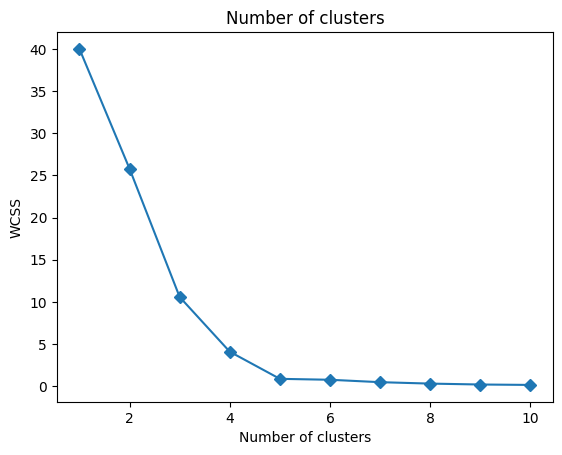

In [45]:
plt.plot(range(1,11),wcss,marker='D')
plt.title('Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
kmeans=KMeans(n_clusters=5,random_state=42)
df_customers['Cluster']=kmeans.fit_predict(X_scaled)

In [47]:
df_customers

,CustomerID,AnnualIncome,SpendingScore,Cluster
0,1,15,79,2
1,2,16,81,2
2,3,17,76,2
3,4,18,75,2
4,5,19,73,2
5,6,20,72,2
6,7,25,40,0
7,8,28,42,0
8,9,30,39,0
9,10,33,35,0


In [48]:
centroid=kmeans.cluster_centers_
centroid

array([[-0.41905213, -0.83325572],
       [ 1.58308582,  1.23316387],
       [-1.11209988,  0.75545789],
       [ 1.06374771, -1.63307202],
       [ 0.27578644,  0.27775191]])

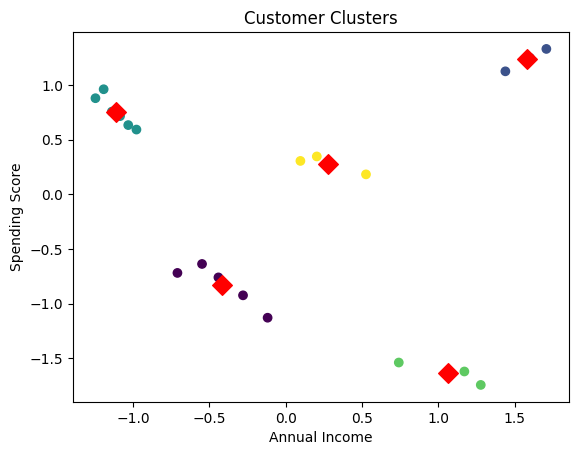

In [49]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=df_customers['Cluster'])
plt.scatter(centroid[:,0],centroid[:,1],marker='D',s=100,c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Clusters')
plt.show()
